In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nilearn
from nilearn import image, regions, plotting, masking,datasets
import numpy as np
import pandas as pd
import nibabel as nib
import os
import numpy 
import sys
sys.path.append('../utils')
import CCAHCP

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


### CCA analysis 
**Input brain features X and behavior features Y, and confounders**

In [4]:
## input data
Xinp = np.load('../data/HCPYA_behavior/CCA_fmat_X.npy')
Yinpdf = pd.read_csv('../data/HCPYA_behavior/CCA_behavior_y.csv')
cfdf = pd.read_csv('../data/HCPYA_behavior/CCA_confounds.csv')    
cf_list = ['age', 'BPDiastolic','BPSystolic','HbA1C', 'Acquisitionint','fd_mean']

We investigated 159 behavior phenotypes (full list arranged in the **supplementary material**), further info for each phenotyps plz refer to [official HCP-YA page](https://wiki.humanconnectome.org/display/PublicData/HCP-YA+Data+Dictionary-+Updated+for+the+1200+Subject+Release).

In [5]:
measures = pd.read_csv('../data/HCPYA_behavior/hcp_behavior_list.csv')['variable'].values.tolist()
# measures_include_info = measures + ['Subject','Gender']

In [6]:
cca_input_dict = CCAHCP.preproc_CCA(Xinp,Yinpdf,cfdf,measures,cf_list)
cca_res = CCAHCP.cca_analysis(cca_input_dict)
res_resume = CCAHCP.resume_pattern_results(cca_input_dict,cca_res)

## plot brain pattern

In [7]:
atlas_Schaefer200 = image.load_img('../data/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz')
atlas_Buckner17 = image.load_img('../data/Buckner_17Networks.nii')
atlas_tiansubcortex = image.load_img('../data/Tian_Subcortex_S4_3T_1mm.nii.gz')

In [8]:
xweight_m1 = res_resume['m1']['x']['clean']
xweight_m2 = res_resume['m2']['x']['clean']

## weights from cortical regions
cortex_m1 = res_resume['m1']['x']['clean'][:200]
cortex_m2 = res_resume['m2']['x']['clean'][:200]

## weights from subcortical regions
subc_m1 = xweight_m1[200:254]
subc_m2 = xweight_m2[200:254]
mode1_subc_mni = CCAHCP.load_data_into_atlas(subc_m1,atlas_tiansubcortex,54)
mode2_subc_mni = CCAHCP.load_data_into_atlas(subc_m2,atlas_tiansubcortex,54)

## weights from cerebral regions
cere_m1 = xweight_m1[254:]
cere_m2 = xweight_m2[254:]
mode1_b17_mni = CCAHCP.load_data_into_atlas(cere_m1,atlas_Buckner17,17)
mode2_b17_mni = CCAHCP.load_data_into_atlas(cere_m2,atlas_Buckner17,17)

### mode1

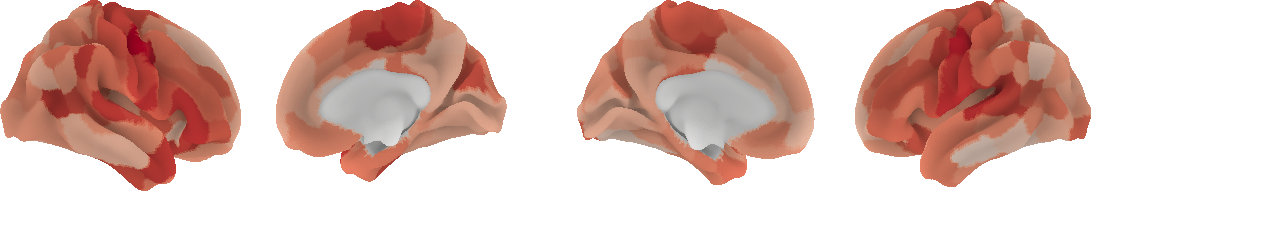

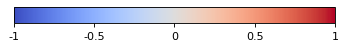

In [9]:
CCAHCP.viz_xdata(cortex_m1,
      'mode1',colormap='coolwarm',folder=f'cortex_mode1',vmax = 1)

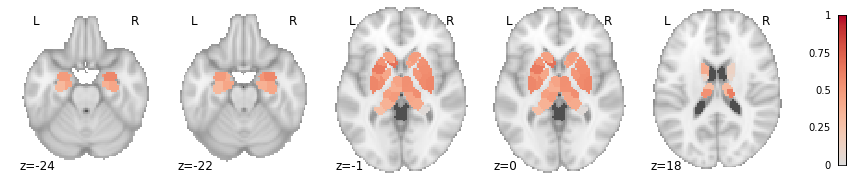

In [10]:
m1 = plotting.plot_stat_map(mode1_subc_mni,cmap = 'coolwarm',
                            display_mode ='z',
                            cut_coords = 5,
                            vmax = 1,
                            draw_cross = False,
                           )

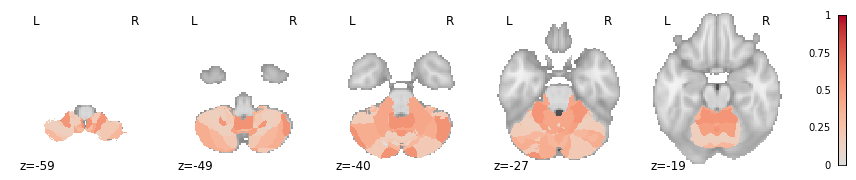

In [11]:
m1 = plotting.plot_stat_map(mode1_b17_mni,cmap = 'coolwarm',
                            display_mode ='z',
                            cut_coords =5,
                            vmax = 1,
                            draw_cross = False,
                           )

## mode2

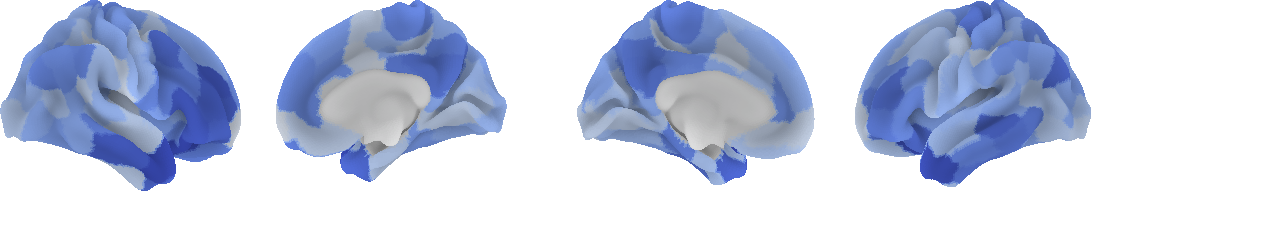

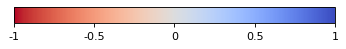

In [12]:
CCAHCP.viz_xdata(cortex_m2,
      'mode2',colormap='coolwarm_r',folder=f'cortex_mode2',vmax = 1)

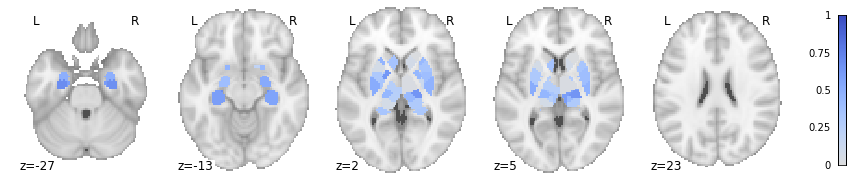

In [13]:
m2= plotting.plot_stat_map(mode2_subc_mni,cmap = 'coolwarm_r',
                            display_mode ='z',
                            cut_coords = 5,
                            vmax = 1,
                            draw_cross = False,
                           )

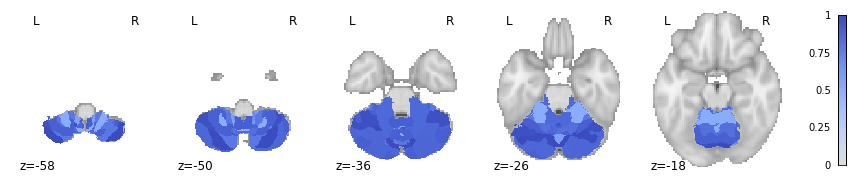

In [14]:
m2 = plotting.plot_stat_map(mode2_b17_mni,cmap = 'coolwarm_r',
                            display_mode ='z',
                            cut_coords =5,
                            vmax = 1,
                            draw_cross = False,
                           )